2017-10811 물리천문학부 곽하늘 전산천문학 과제 6

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Eigenvalue problem

$$M_i n_i = n_e \sum_{k \ne i} q_{ki} n_k + \sum_{k>i} A_{ki} n_k $$

라고 하자. 즉 이것은 Eigenvalue problem이다. 복잡하게 식을 전개하지 말고 컴퓨터를 이용하자. 벡터(행렬) $M$ 을 정의하자. 

In [4]:
N = 5
A, Omg, lam, E \
 = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N))

lam[0, 1], E[0, 1], A[1, 0], Omg[1, 0] = 88.356e-6, 0.014, 2.7e-5, 0.55
lam[0, 2], E[0, 2], A[2, 0], Omg[2, 0] = 32.661e-6, 0.038, 3.1e-11, 0.27
lam[0, 3], E[0, 3], A[3, 0], Omg[3, 0] = 4931.1e-10, 2.514, 1.7e-6, 0.254
lam[0, 4], E[0, 4], A[4, 0], Omg[4, 0] = 0, 5.3, 0, 0.032
lam[1, 2], E[1, 2], A[2, 1], Omg[2, 1] = 51.814e-6, 0.024, 9.7e-5, 1.29
lam[1, 3], E[1, 3], A[3, 1], Omg[3, 1] = 4958.9e-10, 2.5, 6.8e-3, 0.763
lam[1, 4], E[1, 4], A[4, 1], Omg[4, 1] = 2321e-10, 5.314, 2.3e-1, 0.097
lam[2, 3], E[2, 3], A[3, 2], Omg[3, 2] = 5006.9e-10, 2.476, 2e-2, 1.272
lam[2, 4], E[2, 4], A[4, 2], Omg[4, 2] = 2331.4e-10, 5.318, 6.1e-4, 0.161
lam[3, 4], E[3, 4], A[4, 3], Omg[4, 3] = 4363.2e-10, 2.842, 1.6, 0.58
omega = np.array([1, 3, 5, 5, 1])

#### (a) 

In [7]:
def population(ne, t):
    
    q = np.zeros((N, N))
    
    for j in range(N): 
        for i in range(N):
            if j>i: 
                q[j, i] = 8.629e-8/np.sqrt(t)*Omg[j, i]/omega[j]
                q[i, j] = omega[j]/omega[i]*q[j, i]*np.exp(-1.1605*E[i, j]/t)

    M = np.zeros(N)

    for i in range(N): # n_i 앞에 붙은 계수인 M_i 정의 완료
        M[i] = ne*(sum(q[i])-q[i, i])+sum(A[i, :i])

    matrix = np.zeros((N, N))    

    for i in range(N):
        for k in range(N):
            if k==i: matrix[i, k] = M[i]
            elif k>i: matrix[i, k] = -ne*q[k, i]-A[k, i]
            else: matrix[i, k] = -ne*q[k, i]
            if i == N-1: matrix[i, k] = 1
            # i = 4 일 때의 식은 무시하고 그냥 1, 1, 1, 1, 1로 대입함 

    RHS = np.array([0, 0, 0, 0, 1])

    n = np.linalg.solve(matrix, RHS)
    return n

In [8]:
Ne = [100, 100, 10]
T = [1e4, 2e4, 1e4]

for i in range(len(Ne)):
    ne, t = Ne[i], T[i]
    print(f'({ne}cm^-3, {t:.0f}K) 에서\nn = {population(ne, t)}\n')

(100cm^-3, 10000K) 에서
n = [9.96053358e-01 3.51824580e-03 4.27487133e-04 9.07530630e-07
 1.50752869e-09]

(100cm^-3, 20000K) 에서
n = [9.97205887e-01 2.49120467e-03 3.02265648e-04 6.41823800e-07
 1.06629867e-09]

(10cm^-3, 10000K) 에서
n = [9.99603904e-01 3.53271577e-04 4.27332876e-05 9.07525536e-08
 1.50747220e-10]



모든 n들이 다 양수가 나오기 때문에, 정확하게 풀이한 것으로 추측할 수 있다. 

#### (b)

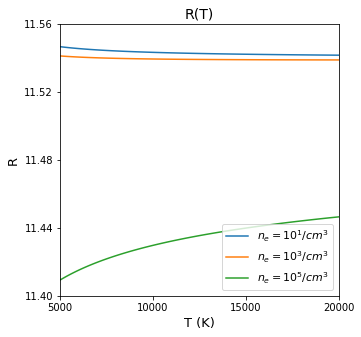

In [6]:
Ne = [1e1, 1e3, 1e5]
T = np.linspace(5e3, 2e4, 101)

R = np.zeros((len(Ne), len(T)))

for i in range(len(Ne)):
    for j in range(len(T)):
        _, _, _, n4, n5 = population(Ne[i], T[j])
        R[i, j] = n4*(A[3, 2]*lam[2, 3]+A[3, 1]*lam[1, 3])/(n5*A[4, 3]*lam[3, 4])

fig1b = plt.figure(1, figsize = (5, 5))
for i in range(len(Ne)):
    plt.plot(T, R[i], label=fr'$n_e=10^{2*i+1}/cm^3$')
plt.xlabel('T (K)', fontsize=13)
plt.ylabel('R', fontsize=13)
plt.xlim([5000, 20000])
plt.xticks(np.linspace(5e3, 2e4, 4))
plt.yticks(np.linspace(11.40, 11.56, 5))
plt.legend(loc='lower right', fontsize=11)
plt.title('R(T)', fontsize=14)
plt.show()

#### (c)

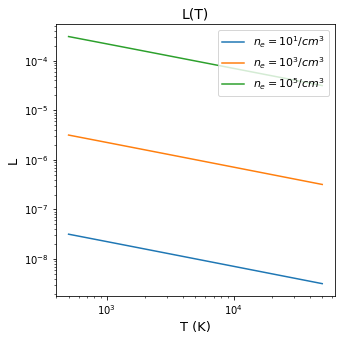

In [8]:
ne = [1e1, 1e3, 1e5]
T = np.logspace(np.log10(500), np.log10(5e4), 101)
tot = 0
L = np.zeros((len(ne), len(T)))

for num in range(len(ne)):
    for idx in range(len(T)):
        n = population(ne[num], T[idx])
        tot = 0
        for i in range(1, N):
            temp = 0
            for k in range(i):
                temp += A[i, k]*E[k, i]
            tot += n[i]*temp
        L[num, idx] = tot
        
fig1c = plt.figure(2, figsize = (5, 5))
for i in range(len(ne)):
    plt.plot(T, L[i], label=fr'$n_e=10^{2*i+1}/cm^3$')
plt.xlabel('T (K)', fontsize=13)
plt.ylabel('L', fontsize=13)
plt.loglog()
plt.legend(loc=1, fontsize=11)
plt.title('L(T)', fontsize=14)
plt.show()

#### 2. Optimization

In [16]:
def f2(x):
    return (x[0]**2-10*x[1])**2 + 2*(x[1]**2) - 3*x[0]

def gradf2(x):
    dfx = 4*x[0]*(x[0]**2-10*x[1]) - 3
    dfy = -20*(x[0]**2-10*x[1]) + 4*x[1]
    return np.array([dfx, dfy]) 

def golden_ND(f, x, u, tol): # u는 방향을 나타내는 벡터  
    dim = len(x) # 벡터의 차원 
    amp = np.sqrt(sum(u**2))
    dr = u/amp
    w, err, loop = 0.5*(3-np.sqrt(5)), 11, -1 
    a = x - dr 
    b = x + dr 
    while err > tol:
        loop += 1
        x1 = a + w*(b-a)
        x2 = b - w*(b-a)
        f1 = f(x1)
        f2 = f(x2)
        if f1>f2: a = x1
        else: b = x2
        err = np.sqrt(sum((b-a)**2))
        if loop >= 100: break
         
    xmin = np.array(0.5*(a+b)) # 혹시 모르니 한 번 더 array로 바꿔 줌
    return xmin, err, loop

#### (a)

In [17]:
def steep(f, gradf, x0, tol):
    err = 1
    loop = 0
    array_X = [] 
    array_Y = [] # 이 두 값은 2D에서만 가능!
    while err > tol:
        loop += 1
        u = gradf(x0) # minimum을 찾는 방향의 벡터 
        x = golden_ND(f, x0, u, tol)[0]
        err = np.sqrt(sum((x-x0)**2))
        x0 = x
        array_X.append(x[0])
        array_Y.append(x[1])
        
    xmin = 0.5*(x0+x)
    return xmin, err, loop, np.array([array_X, array_Y])

In [18]:
x0 = np.array([-5, 2])
tol = 1e-8
print(steep(f2, gradf2, x0, tol)[0:3]) # 순서대로 x, y, err, loop 수

(array([3.36933179, 1.11298007]), 6.039371740568172e-09, 361)


#### (b)

In [19]:
def powell(f, x0, tol): # N-dimensional powell method
    N = len(x0)
    array_X = [] 
    array_Y = [] # 이 두 값은 2D에서만 가능!
    u0 = np.eye(N, N)
    x1 = x0 # 초기화 
    # 초기 위치에서 x, y, z, ... 축 방향으로의 minimum들을 찾자. 
    for i in range(N-1): 
        x1 = golden_ND(f, x1, u0[i], tol)[0]
    u1 = u0[-1] # 두 번째 방향 벡터 
    x2 = golden_ND(f, x1, u1, tol)[0] # 마지막 축 방향을 이용한 min
    u2 = x2-x0 # 세 번째 방향 벡터 
    loop = 0
    err = np.sqrt(sum((x2-x1)**2))
    while err > tol:
        loop += 1
        x0 = golden_ND(f, x2, u2, tol)[0]
        x1 = golden_ND(f, x0, u1, tol)[0]
        x2 = golden_ND(f, x1, u2, tol)[0]
        u1 = u2
        u2 = x2-x0
        array_X.append(x2[0])
        array_Y.append(x2[1])
        err = np.sqrt(sum((u2)**2))
        # if loop >= 100: break
    xmin = (x0+x1+x2)/3
    return xmin, err, loop, np.array([array_X, array_Y])

Steepest method
(array([3.36933179, 1.11298007]), 6.039371740568172e-09, 361)
Powell method
(array([3.36933206, 1.11298025]), 8.78532976984311e-09, 14)


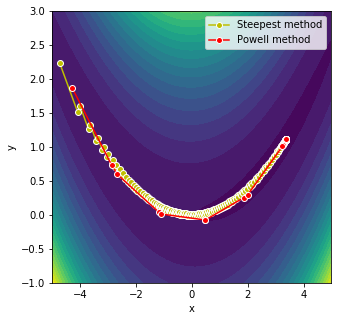

In [21]:
x0 = np.array([-5, 2])
stp = steep(f2, gradf2, x0, tol)
powl = powell(f2, x0, tol)
print('Steepest method')
print(stp[0:3])
print('Powell method')
print(powl[0:3])

X = np.linspace(-5, 5, 101)
Y = np.linspace(-1, 3, 101)

X, Y = np.meshgrid(X, Y)
vec = np.array([X, Y])

fig2 = plt.figure(2, figsize = (5, 5))
plt.contourf(X, Y, f2(vec), 20)
plt.plot(stp[-1][0], stp[-1][1], 'yo-', mec='white', label='Steepest method')
plt.plot(powl[-1][0], powl[-1][1], 'ro-', mec='white', label='Powell method')
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

실제로 직접 미분해서 극소점을 찾아 보면 $ x^3 = 38.25 $ 이 되어 (a), (b)의 결과와 일치한다. 한편, 3차원 이상의 함수의 경우 Powell's mehtod가 잘 되지 않았다. 코드를 짤 때 2차원 예제에 기반해서 구현하였기 때문에 알고리즘에 수정이 필요해 보인다. 하지만 2차원 이하에서는 잘 된다. 

#### 3. Conjugate gradient method 

In [22]:
def f3(x):
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2 \
            + 100*(x[2]-x[1]**2)**2 + (1-x[2])**2
    
def gradf3(x):
    dfx = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    dfy = 200*(x[1]-x[0]**2) - 400*x[1]*(x[2]-x[1]**2)
    dfz = 200*(x[2]-x[1]**2) - 2*(1-x[2])
    return np.array([dfx, dfy, dfz])

def conj(f, gradf, x0, tol): # N-dimensional conjugate method
    
    loop = 0
    g0 = -gradf(x0) # 시작점 
    amp = np.sqrt(sum(g0**2))
    x = golden_ND(f, x0, g0/amp, tol)[0] # g0 방향의 minumum
    gradfP1 = gradf(x)
    lam = sum(gradfP1**2) / amp**2
    g1 = -gradfP1 + lam*g0
    err = np.sqrt(sum((x-x0)**2))
    while err >= tol:
        loop += 1
        x = x0 # 이전 minimum
        g0 = g1
        gradfP1 = gradf(x)
        lam = (gradfP1[0]**2 + gradfP1[1]**2)/(g0[0]**2 + g0[1]**2)
        g1 = -gradfP1 + lam*g0
        amp = np.sqrt(g1[0]**2+g1[1]**2)
        x0 = golden_ND(f, x, g1/amp, tol)[0]
        err = np.sqrt(sum((x-x0)**2))
        # if loop > 100: break
        
    xmin = 0.5*(x0+x)
    
    return xmin, loop

In [23]:
tol = 1e-10
x0 = np.array([0, 2, 1])
print(conj(f3, gradf3, x0, tol))

(array([0.99999999, 0.99999998, 0.99999997]), 281)


Steepest method로 하면 loop가 6748번 실행된다. 따라서 Conjugate method가 훨씬 빠른 방법이다. 2차원에서는 길어야 수백 번이었지만 3차원이 되면서 많은 iteration이 필요해진다. 계산 결과 $(1,\ 1,\ 1)$ 에서 $\nabla f = 0$ 이 됨을 유추할 수 있는데, 이는 식을 계산해도 정확하다. 

#### 4. FFT

In [66]:
file4 = 'sol_vel.txt'
t, v1, v2 = np.loadtxt(file4, unpack=True, usecols=[])

#### (a)

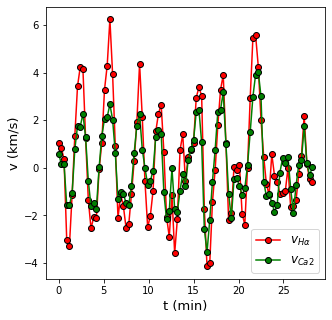

In [67]:
fig4a = plt.figure(4, figsize = (5, 5))
plt.plot(t, v1, 'ro-', mec='k', label=r'$v_{H\alpha}$')
plt.plot(t, v2, 'go-', mec='k', label=r'$v_{Ca2}$')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('t (min)', fontsize=13)
plt.ylabel('v (km/s)', fontsize=13)
plt.show()

#### (b)

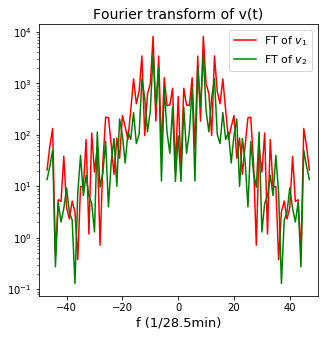

In [68]:
F1 = np.fft.fftshift(np.fft.fft(v1))
F2 = np.fft.fftshift(np.fft.fft(v2))
P1 = abs(F1)**2
P2 = abs(F2)**2

n = len(v1)
dt = t[1]-t[0]
dT = t[-1]-t[0]+dt
freq = np.fft.fftshift(np.fft.fftfreq(n, 1/n))

fig4b = plt.figure(5, figsize = (5, 5))
plt.plot(freq, P1, 'r-', label=r'FT of $v_1$')
plt.plot(freq, P2, 'g-', label=r'FT of $v_2$')
plt.legend(loc=1, fontsize=11)
plt.xlabel(fr'f (1/{dT}min)', fontsize=13)
plt.xlim([-50, 50])
plt.yscale('log')
plt.title('Fourier transform of v(t)', fontsize=14)
plt.show()

#### (c)

In [69]:
f1 = freq[np.where(P1==max(P1))]
f2 = freq[np.where(P2==max(P2))]

print(f1, f2)

[-9.  9.] [-9.  9.]


따라서 $v_{H\alpha}$ 와 $v_{Ca}$ 의 진동수는 (가장 큰 세기를 갖는 FT component는) $9/28.5 \min^{-1} = 0.316 \min^{-1} $ 이다. 즉 주기는 $3.17 \min$ 이다. 

#### (d)

$$ \mathcal F \left[\int_{-\infty}^{\infty} f(\tau+t)g(\tau) d\tau\right]  = \int_{-\infty}^{\infty} f(t+\tau)e^{i2\pi\nu(t+\tau)} g(\tau)e^{-i2\pi\nu\tau} d\tau dt$$

$$= \mathcal F \left( f \right)\bullet \mathcal F^* \left(g \right) $$

이 성립한다. 따라서 $f$ 의 ft와 $g$ 의 ft의 complex conjugate의 곱을 다시 inverse fourier transform 하면 된다. 

In [90]:
func1 = np.fft.fft(v1)
func2 = np.fft.fft(v2)
func = func1*np.conj(func2)

corr = np.fft.ifft(func) # machine epsilon 정도의 imaginary part를 갖는다. 
corr = corr.real

조금 번거롭지만 직접 적분하는 방법도 있다. 

In [133]:
def simp(array, x): # simpson rule
    h = x[1]-x[0]
    final = np.where(array!=0)[0][-1]
    tot = array[0]+array[final]
    for i in range(1, final-1):
        if i%2==1: tot+=4*array[i]
        else: tot+=2*array[i]
    integral = tot*h 
    # 여기를 3으로 나눠야 되는데 왜 나누지 않아야 결과가 맞는지 
    # 도저히 모르겠다!
    return integral

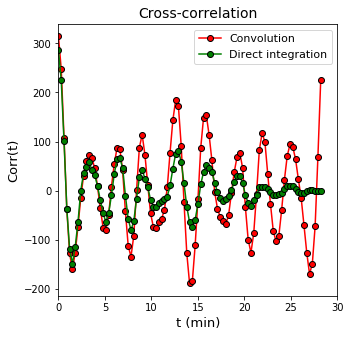

In [134]:
v1_temp = np.concatenate((v1, np.zeros(len(t))))
corr1 = np.zeros(len(t))

for num in range(len(t)):
    array = np.zeros(2*len(t))
    for i in range(len(t)):
        array[i] = v1_temp[num+i]*v2[i]
    corr1[num] = simp(array, t)

fig4d = plt.figure(6, figsize = (5, 5))
plt.plot(t, corr, 'ro-', mec='k', label='Convolution')
plt.plot(t, corr1, 'go-', mec='k', label='Direct integration')
plt.xlim([0, 30])
plt.legend(loc=1, fontsize=11)
plt.xlabel('t (min)', fontsize=13)
plt.ylabel('Corr(t)', fontsize=13)
plt.title('Cross-correlation', fontsize=14)
plt.show()

아래의 이유 때문에 불일치가 생긴다. Convolution을 FT로 바꿔서 푸는 경우는 $t=-\infty$ 에서 $t=\infty$ 까지 데이터가 있는 경우에 정확한 방법이고, 실제로는 데이터는 $t=0\sim30$ 까지만 있기 때문에 $t<0,\;t>30$ 에서는 $v=0$ 이 된다. 그런데 convolution을 fourier transform으로 바꿔서 푸는 것은 $0\le t \le 30$ 의 데이터가 주기적으로 반복된다고 생각하고 푸는 것이므로 사실 틀린 결과를 준다. 즉 직접 적분하는 것이 맞다. 한편 그럼에도 불구하고 대략적인 경향은 두 그래프가 비슷하다. 